
 **PGCC009 Ciência de Dados e Aprendizado de Máquina<br>
Atividade 3**

Para esta atividade vamos usar mais uma base disponibilizada pela iniciativa Dados Abertos de Feira (https://www.dadosabertosdefeira.com.br/) com dados do Mapa da Violência de Feira de Santana (https://dadosabertosdefeira.medium.com/mapa-da-viol%C3%AAncia-de-feira-de-santana-2017-a-2020-c267ad0088aa)

São dados de registros de ocorrências policiais no município de Feira de Santana tendo policiais militares como condutores, obtidos da  coordenação de documentação e estatística policial  da Policia Civil da Bahia.

Estes dados foram pré-processados e transformados pelo professor para contagem semanal das ocorrências mais frequentes nos bairros com maior número de ocorrências, e está disponível em http://aulas.artificial.eng.br/Home/pgcc009/ocorrenciassemanaisporbairro-feiradesantana.csv

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import sklearn
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from scipy.stats import randint

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import plot_confusion_matrix

import xgboost
from xgboost import XGBClassifier

import time

from sklearn.utils import shuffle

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.feature_selection import RFE

#Regressão
from sklearn.metrics import mean_squared_error, r2_score

from sklearn import linear_model
from sklearn import neighbors
from sklearn.svm import SVR

from IPython.display import display, HTML
import urllib.request

In [3]:
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.61 Safari/537.36')]
urllib.request.install_opener(opener)

url = "http://aulas.artificial.eng.br/Home/pgcc009/ocorrenciassemanaisporbairro-feiradesantana.csv"
urllib.request.urlretrieve (url, "ocorrenciassemanaisporbairro-feiradesantana.csv")

ocorrdf = pd.read_csv("ocorrenciassemanaisporbairro-feiradesantana.csv",index_col=False)


In [ ]:
display("DIMENSOES", ocorrdf.shape)

'DIMENSOES'

(2094, 44)

In [ ]:
display(ocorrdf.nunique())

display(ocorrdf.dtypes)

Unnamed: 0        2094
bairro              10
isoyear              5
isoweek             53
AMEACA              17
ESTELIONATO         32
FURTO               57
HOMICIDIO            5
INJURIA              5
LESAO               12
ROUBO               34
VIAS                 4
week-1s             52
year-1s              5
week-2s             52
year-2s              5
isoyear-1s           5
isoweek-1s          52
AMEACA-1s           17
ESTELIONATO-1s      32
FURTO-1s            57
HOMICIDIO-1s         5
INJURIA-1s           5
LESAO-1s            12
ROUBO-1s            34
VIAS-1s              4
week-1s-1s          52
year-1s-1s           5
week-2s-1s          52
year-2s-1s           5
isoyear-2s           5
isoweek-2s          52
AMEACA-2s           17
ESTELIONATO-2s      32
FURTO-2s            57
HOMICIDIO-2s         5
INJURIA-2s           5
LESAO-2s            12
ROUBO-2s            34
VIAS-2s              4
week-1s-2s          52
year-1s-2s           5
week-2s-2s          52
year-2s-2s 

Unnamed: 0          int64
bairro             object
isoyear             int64
isoweek             int64
AMEACA            float64
ESTELIONATO       float64
FURTO             float64
HOMICIDIO         float64
INJURIA           float64
LESAO             float64
ROUBO             float64
VIAS              float64
week-1s             int64
year-1s             int64
week-2s             int64
year-2s             int64
isoyear-1s        float64
isoweek-1s        float64
AMEACA-1s         float64
ESTELIONATO-1s    float64
FURTO-1s          float64
HOMICIDIO-1s      float64
INJURIA-1s        float64
LESAO-1s          float64
ROUBO-1s          float64
VIAS-1s           float64
week-1s-1s        float64
year-1s-1s        float64
week-2s-1s        float64
year-2s-1s        float64
isoyear-2s        float64
isoweek-2s        float64
AMEACA-2s         float64
ESTELIONATO-2s    float64
FURTO-2s          float64
HOMICIDIO-2s      float64
INJURIA-2s        float64
LESAO-2s          float64
ROUBO-2s    

In [4]:
df = ocorrdf
df.head()

,Unnamed: 0,bairro,isoyear,isoweek,AMEACA,ESTELIONATO,FURTO,HOMICIDIO,INJURIA,LESAO,ROUBO,VIAS,week-1s,year-1s,week-2s,year-2s,isoyear-1s,isoweek-1s,AMEACA-1s,ESTELIONATO-1s,FURTO-1s,HOMICIDIO-1s,INJURIA-1s,LESAO-1s,ROUBO-1s,VIAS-1s,week-1s-1s,year-1s-1s,week-2s-1s,year-2s-1s,isoyear-2s,isoweek-2s,AMEACA-2s,ESTELIONATO-2s,FURTO-2s,HOMICIDIO-2s,INJURIA-2s,LESAO-2s,ROUBO-2s,VIAS-2s,week-1s-2s,year-1s-2s,week-2s-2s,year-2s-2s
0,0,BRASILIA,2017,1,1.0,2.0,1.0,NaN,NaN,1.0,5.0,1.0,52,2016,51,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,BRASILIA,2017,2,2.0,2.0,3.0,NaN,NaN,1.0,1.0,NaN,1,2017,52,2016,2017.0,1.0,1.0,2.0,1.0,NaN,NaN,1.0,5.0,1.0,52.0,2016.0,51.0,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,BRASILIA,2017,3,2.0,1.0,3.0,NaN,NaN,1.0,2.0,NaN,2,2017,1,2017,2017.0,2.0,2.0,2.0,3.0,NaN,NaN,1.0,1.0,NaN,1.0,2017.0,52.0,2016.0,2017.0,1.0,1.0,2.0,1.0,NaN,NaN,1.0,5.0,1.0,52.0,2016.0,51.0,2016.0
3,3,BRASILIA,2017,4,NaN,NaN,1.0,NaN,NaN,NaN,4.0,NaN,3,2017,2,2017,2017.0,3.0,2.0,1.0,3.0,NaN,NaN,1.0,2.0,NaN,2.0,2017.0,1.0,2017.0,2017.0,2.0,2.0,2.0,3.0,NaN,NaN,1.0,1.0,NaN,1.0,2017.0,52.0,2016.0
4,4,BRASILIA,2017,5,4.0,1.0,NaN,NaN,NaN,NaN,5.0,NaN,4,2017,3,2017,2017.0,4.0,NaN,NaN,1.0,NaN,NaN,NaN,4.0,NaN,3.0,2017.0,2.0,2017.0,2017.0,3.0,2.0,1.0,3.0,NaN,NaN,1.0,2.0,NaN,2.0,2017.0,1.0,2017.0


In [ ]:
df.describe()

,Unnamed: 0,isoyear,isoweek,AMEACA,ESTELIONATO,FURTO,HOMICIDIO,INJURIA,LESAO,ROUBO,VIAS,week-1s,year-1s,week-2s,year-2s,isoyear-1s,isoweek-1s,AMEACA-1s,ESTELIONATO-1s,FURTO-1s,HOMICIDIO-1s,INJURIA-1s,LESAO-1s,ROUBO-1s,VIAS-1s,week-1s-1s,year-1s-1s,week-2s-1s,year-2s-1s,isoyear-2s,isoweek-2s,AMEACA-2s,ESTELIONATO-2s,FURTO-2s,HOMICIDIO-2s,INJURIA-2s,LESAO-2s,ROUBO-2s,VIAS-2s,week-1s-2s,year-1s-2s,week-2s-2s,year-2s-2s
count,2094.000000,2094.000000,2094.000000,1761.000000,1121.000000,1768.000000,486.000000,691.000000,1254.000000,2018.000000,391.000000,2094.000000,2094.000000,2094.000000,2094.000000,2082.000000,2082.000000,1754.000000,1118.000000,1764.000000,486.000000,689.000000,1249.000000,2006.000000,391.000000,2082.000000,2082.000000,2082.000000,2082.00000,2072.000000,2072.000000,1746.000000,1112.000000,1756.000000,485.000000,684.000000,1244.000000,2000.000000,388.000000,2072.000000,2072.000000,2072.000000,2072.000000
mean,1046.500000,2018.499522,26.711079,3.304373,3.658341,6.172511,1.323045,1.392185,2.100478,6.521308,1.179028,26.704394,2018.480420,26.697708,2018.461318,2018.491835,26.597502,3.310718,3.661002,6.179705,1.323045,1.393324,2.104884,6.542373,1.179028,26.596542,2018.472622,26.595581,2018.45341,2018.484556,26.475869,3.312142,3.665468,6.190205,1.319588,1.393275,2.107717,6.546000,1.180412,26.479730,2018.465251,26.483591,2018.445946
std,604.630052,1.126813,15.126196,2.521595,6.585980,10.624272,0.623065,0.704764,1.518006,5.865269,0.445686,15.112542,1.135093,15.099315,1.142994,1.124700,15.051006,2.524230,6.594029,10.633961,0.623065,0.705470,1.519441,5.875173,0.445686,15.044561,1.132911,15.038178,1.14074,1.122507,14.982314,2.526522,6.608885,10.645826,0.619023,0.706806,1.520989,5.883213,0.447130,14.983802,1.130649,14.985031,1.138405
min,0.000000,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2016.000000,1.000000,2016.000000,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2016.000000,1.000000,2016.00000,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2016.000000,1.000000,2016.000000
25%,523.250000,2017.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,14.000000,2017.000000,14.000000,2017.000000,2017.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,14.000000,2017.000000,14.000000,2017.00000,2017.000000,13.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,13.750000,2017.000000,13.750000,2017.000000
50%,1046.500000,2019.000000,27.000000,3.000000,2.000000,2.000000,1.000000,1.000000,2.000000,5.000000,1.000000,27.000000,2018.000000,27.000000,2018.000000,2018.000000,27.000000,3.000000,2.000000,2.000000,1.000000,1.000000,2.000000,5.000000,1.000000,27.000000,2018.000000,27.000000,2018.00000,2018.000000,26.500000,3.000000,2.000000,2.000000,1.000000,1.000000,2.000000,5.000000,1.000000,26.500000,2018.000000,26.500000,2018.000000
75%,1569.750000,2020.000000,40.000000,4.000000,3.000000,4.000000,2.000000,2.000000,3.000000,8.000000,1.000000,40.000000,2019.000000,40.000000,2019.000000,2019.000000,40.000000,4.000000,3.000000,4.000000,2.000000,2.000000,3.000000,8.000000,1.000000,40.000000,2019.000000,40.000000,2019.00000,2019.000000,39.000000,4.000000,3.000000,4.000000,2.000000,2.000000,3.000000,8.000000,1.000000,39.000000,2019.000000,39.000000,2019.000000
max,2093.000000,2020.000000,53.000000,20.000000,123.000000,71.000000,5.000000,5.000000,13.000000,41.000000,4.000000,52.000000,2020.000000,52.000000,2020.000000,2020.000000,52.000000,20.000000,123.000000,71.000000,5.000000,5.000000,13.000000,41.000000,4.000000,52.000000,2020.000000,52.000000,2020.00000,2020.000000,52.000000,20.000000,123.000000,71.000000,5.000000,5.000000,13.000000,41.000000,4.000000,52.000000,2020.000000,52.000000,2020.000000


In [5]:
df.drop(['week-1s-1s', 'year-1s-1s', 'week-2s-1s', 'year-2s-1s', 'year-2s-2s', 'week-2s-2s', 'year-2s-1s', 'week-1s-2s', 'year-1s-2s'], axis='columns', inplace=True)

In [ ]:
display("DIMENSOES", ocorrdf.shape)

'DIMENSOES'

(2094, 36)

In [ ]:
df.head()

,Unnamed: 0,bairro,isoyear,isoweek,AMEACA,ESTELIONATO,FURTO,HOMICIDIO,INJURIA,LESAO,ROUBO,VIAS,week-1s,year-1s,week-2s,year-2s,isoyear-1s,isoweek-1s,AMEACA-1s,ESTELIONATO-1s,FURTO-1s,HOMICIDIO-1s,INJURIA-1s,LESAO-1s,ROUBO-1s,VIAS-1s,isoyear-2s,isoweek-2s,AMEACA-2s,ESTELIONATO-2s,FURTO-2s,HOMICIDIO-2s,INJURIA-2s,LESAO-2s,ROUBO-2s,VIAS-2s
0,0,BRASILIA,2017,1,1.0,2.0,1.0,NaN,NaN,1.0,5.0,1.0,52,2016,51,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,BRASILIA,2017,2,2.0,2.0,3.0,NaN,NaN,1.0,1.0,NaN,1,2017,52,2016,2017.0,1.0,1.0,2.0,1.0,NaN,NaN,1.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,BRASILIA,2017,3,2.0,1.0,3.0,NaN,NaN,1.0,2.0,NaN,2,2017,1,2017,2017.0,2.0,2.0,2.0,3.0,NaN,NaN,1.0,1.0,NaN,2017.0,1.0,1.0,2.0,1.0,NaN,NaN,1.0,5.0,1.0
3,3,BRASILIA,2017,4,NaN,NaN,1.0,NaN,NaN,NaN,4.0,NaN,3,2017,2,2017,2017.0,3.0,2.0,1.0,3.0,NaN,NaN,1.0,2.0,NaN,2017.0,2.0,2.0,2.0,3.0,NaN,NaN,1.0,1.0,NaN
4,4,BRASILIA,2017,5,4.0,1.0,NaN,NaN,NaN,NaN,5.0,NaN,4,2017,3,2017,2017.0,4.0,NaN,NaN,1.0,NaN,NaN,NaN,4.0,NaN,2017.0,3.0,2.0,1.0,3.0,NaN,NaN,1.0,2.0,NaN


#### Como a quantidade de registos onde os valores ['isoyear', 'isoyear-1s', 'year-1s-2s', 'year-2s-2s', 'year-2s-1s', 'year-1s', 'year-2s'] são NaN é muito baixo, é possível realziar uma remoção desses registros sem perdas para o projeto.



In [6]:
df = df.dropna(subset=['isoyear', 'isoyear-1s', 'year-1s', 'year-2s'])
df.head()

,Unnamed: 0,bairro,isoyear,isoweek,AMEACA,ESTELIONATO,FURTO,HOMICIDIO,INJURIA,LESAO,ROUBO,VIAS,week-1s,year-1s,week-2s,year-2s,isoyear-1s,isoweek-1s,AMEACA-1s,ESTELIONATO-1s,FURTO-1s,HOMICIDIO-1s,INJURIA-1s,LESAO-1s,ROUBO-1s,VIAS-1s,isoyear-2s,isoweek-2s,AMEACA-2s,ESTELIONATO-2s,FURTO-2s,HOMICIDIO-2s,INJURIA-2s,LESAO-2s,ROUBO-2s,VIAS-2s
1,1,BRASILIA,2017,2,2.0,2.0,3.0,NaN,NaN,1.0,1.0,NaN,1,2017,52,2016,2017.0,1.0,1.0,2.0,1.0,NaN,NaN,1.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,BRASILIA,2017,3,2.0,1.0,3.0,NaN,NaN,1.0,2.0,NaN,2,2017,1,2017,2017.0,2.0,2.0,2.0,3.0,NaN,NaN,1.0,1.0,NaN,2017.0,1.0,1.0,2.0,1.0,NaN,NaN,1.0,5.0,1.0
3,3,BRASILIA,2017,4,NaN,NaN,1.0,NaN,NaN,NaN,4.0,NaN,3,2017,2,2017,2017.0,3.0,2.0,1.0,3.0,NaN,NaN,1.0,2.0,NaN,2017.0,2.0,2.0,2.0,3.0,NaN,NaN,1.0,1.0,NaN
4,4,BRASILIA,2017,5,4.0,1.0,NaN,NaN,NaN,NaN,5.0,NaN,4,2017,3,2017,2017.0,4.0,NaN,NaN,1.0,NaN,NaN,NaN,4.0,NaN,2017.0,3.0,2.0,1.0,3.0,NaN,NaN,1.0,2.0,NaN
5,5,BRASILIA,2017,6,3.0,4.0,1.0,NaN,NaN,NaN,3.0,NaN,5,2017,4,2017,2017.0,5.0,4.0,1.0,NaN,NaN,NaN,NaN,5.0,NaN,2017.0,4.0,NaN,NaN,1.0,NaN,NaN,NaN,4.0,NaN


### Tratamento de NULL

#### Os dados que aparecem como NaN correspondem a não ocorrencia do evento, logo, eles podem ser subistituídos por 0

In [7]:
df.isnull().sum()

Unnamed: 0           0
bairro               0
isoyear              0
isoweek              0
AMEACA             331
ESTELIONATO        967
FURTO              322
HOMICIDIO         1597
INJURIA           1392
LESAO              834
ROUBO               73
VIAS              1692
week-1s              0
year-1s              0
week-2s              0
year-2s              0
isoyear-1s           0
isoweek-1s           0
AMEACA-1s          328
ESTELIONATO-1s     964
FURTO-1s           318
HOMICIDIO-1s      1596
INJURIA-1s        1393
LESAO-1s           833
ROUBO-1s            76
VIAS-1s           1691
isoyear-2s          12
isoweek-2s          12
AMEACA-2s          338
ESTELIONATO-2s     971
FURTO-2s           326
HOMICIDIO-2s      1597
INJURIA-2s        1399
LESAO-2s           839
ROUBO-2s            84
VIAS-2s           1694
dtype: int64

In [8]:
df = df.fillna(0, inplace=False)

#.replace(0,np.NAN)

#df.head(20)

In [9]:
df.isnull().sum()

Unnamed: 0        0
bairro            0
isoyear           0
isoweek           0
AMEACA            0
ESTELIONATO       0
FURTO             0
HOMICIDIO         0
INJURIA           0
LESAO             0
ROUBO             0
VIAS              0
week-1s           0
year-1s           0
week-2s           0
year-2s           0
isoyear-1s        0
isoweek-1s        0
AMEACA-1s         0
ESTELIONATO-1s    0
FURTO-1s          0
HOMICIDIO-1s      0
INJURIA-1s        0
LESAO-1s          0
ROUBO-1s          0
VIAS-1s           0
isoyear-2s        0
isoweek-2s        0
AMEACA-2s         0
ESTELIONATO-2s    0
FURTO-2s          0
HOMICIDIO-2s      0
INJURIA-2s        0
LESAO-2s          0
ROUBO-2s          0
VIAS-2s           0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd964a5d90>]],
      dtype=object)

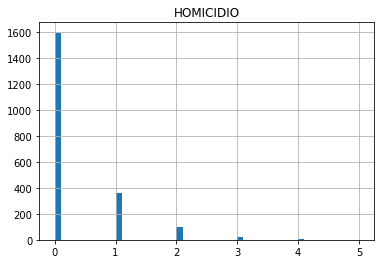

In [10]:
df.hist(bins=50, column='HOMICIDIO')

In [9]:
df['HOMICIDIO'] = df['HOMICIDIO'].replace([2, 3, 4, 5], 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c555f82d0>]],
      dtype=object)

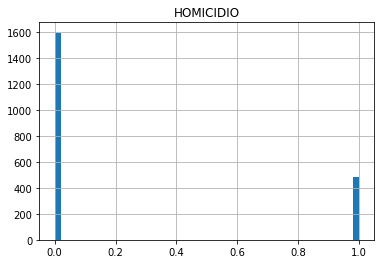

In [10]:
df.hist(bins=50, column='HOMICIDIO')

In [11]:
df.groupby(['bairro'])['HOMICIDIO'].max()

bairro
BRASILIA                1.0
CAMPO LIMPO             1.0
CENTRO                  1.0
CONCEICAO               1.0
DISTRITO DE HUMILDES    1.0
MANGABEIRA              1.0
MUCHILA                 1.0
QUEIMADINHA             1.0
SANTA MONICA            1.0
TOMBA                   1.0
Name: HOMICIDIO, dtype: float64

In [ ]:
df['HOMICIDIO'].count()

2082

In [ ]:
df['HOMICIDIO'][df['HOMICIDIO'] == 1].count()

485

In [ ]:
df['HOMICIDIO'][df['HOMICIDIO'] == 0].count()

1597

### Transformação das variáveis textuais em numéricas

In [11]:
dummy = pd.get_dummies(df['bairro'])
# Take a look
#dummy.head(20)

df = pd.concat([df, dummy], axis=1).drop('bairro', axis=1)
df.head()

,Unnamed: 0,isoyear,isoweek,AMEACA,ESTELIONATO,FURTO,HOMICIDIO,INJURIA,LESAO,ROUBO,VIAS,week-1s,year-1s,week-2s,year-2s,isoyear-1s,isoweek-1s,AMEACA-1s,ESTELIONATO-1s,FURTO-1s,HOMICIDIO-1s,INJURIA-1s,LESAO-1s,ROUBO-1s,VIAS-1s,isoyear-2s,isoweek-2s,AMEACA-2s,ESTELIONATO-2s,FURTO-2s,HOMICIDIO-2s,INJURIA-2s,LESAO-2s,ROUBO-2s,VIAS-2s,BRASILIA,CAMPO LIMPO,CENTRO,CONCEICAO,DISTRITO DE HUMILDES,MANGABEIRA,MUCHILA,QUEIMADINHA,SANTA MONICA,TOMBA
1,1,2017,2,2.0,2.0,3.0,0.0,0.0,1.0,1.0,0.0,1,2017,52,2016,2017.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0
2,2,2017,3,2.0,1.0,3.0,0.0,0.0,1.0,2.0,0.0,2,2017,1,2017,2017.0,2.0,2.0,2.0,3.0,0.0,0.0,1.0,1.0,0.0,2017.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0,5.0,1.0,1,0,0,0,0,0,0,0,0,0
3,3,2017,4,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,3,2017,2,2017,2017.0,3.0,2.0,1.0,3.0,0.0,0.0,1.0,2.0,0.0,2017.0,2.0,2.0,2.0,3.0,0.0,0.0,1.0,1.0,0.0,1,0,0,0,0,0,0,0,0,0
4,4,2017,5,4.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,4,2017,3,2017,2017.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,2017.0,3.0,2.0,1.0,3.0,0.0,0.0,1.0,2.0,0.0,1,0,0,0,0,0,0,0,0,0
5,5,2017,6,3.0,4.0,1.0,0.0,0.0,0.0,3.0,0.0,5,2017,4,2017,2017.0,5.0,4.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,2017.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,1,0,0,0,0,0,0,0,0,0


#### Dado que a quantidade de dados para a classe sem homicídios é aproximadamente 4 vezes maior que a classe sem hominicios, vê se a necessidade de aplicar uma estratégia de balanceamento de classes.

### Primeiramente foi realizado uma estratégia de balanceamento por meio do aumento de dados da classe com menos amostras

In [ ]:
df['HOMICIDIO'][df['HOMICIDIO'] == 1].sum()

485.0

In [ ]:
msk = np.random.rand(len(df)) < 0.8

train = df[msk]
test = df[~msk]

In [ ]:
test['HOMICIDIO'].count(), train['HOMICIDIO'].count()

(432, 1650)

In [ ]:
no_homicidios = train['HOMICIDIO'] == 0
homicidios = train['HOMICIDIO'] == 1

subset1 = train[no_homicidios]
subset2 = train[homicidios]

subset2 = subset2.append(subset2)
subset2 = subset2.append(subset2)

In [ ]:
subset = subset1.append(subset2)
subset = shuffle(subset)

subset[subset['HOMICIDIO'] == 0]['HOMICIDIO'].count(), subset[subset['HOMICIDIO'] == 1]['HOMICIDIO'].count()

(1270, 1520)

### Outra estratégia de balanceamente utilziada foi o Balanceamento por realização de amostragem

In [14]:
msk = np.random.rand(len(df)) < 0.8

train = df[msk]
test = df[~msk]

no_homicidio = train['HOMICIDIO'] == 0
homicidio = train['HOMICIDIO'] == 1

true_index = homicidio[homicidio == True].index

subset1 = train[no_homicidio].sample(frac=0.3)
subset2 = train[homicidio]

subset = subset1.append(subset2)

subset = shuffle(subset)

subset[subset['HOMICIDIO'] == 0]['HOMICIDIO'].count(), subset[subset['HOMICIDIO'] == 1]['HOMICIDIO'].count()

(372, 399)

In [15]:
subset.head()

,Unnamed: 0,isoyear,isoweek,AMEACA,ESTELIONATO,FURTO,HOMICIDIO,INJURIA,LESAO,ROUBO,VIAS,week-1s,year-1s,week-2s,year-2s,isoyear-1s,isoweek-1s,AMEACA-1s,ESTELIONATO-1s,FURTO-1s,HOMICIDIO-1s,INJURIA-1s,LESAO-1s,ROUBO-1s,VIAS-1s,isoyear-2s,isoweek-2s,AMEACA-2s,ESTELIONATO-2s,FURTO-2s,HOMICIDIO-2s,INJURIA-2s,LESAO-2s,ROUBO-2s,VIAS-2s,BRASILIA,CAMPO LIMPO,CENTRO,CONCEICAO,DISTRITO DE HUMILDES,MANGABEIRA,MUCHILA,QUEIMADINHA,SANTA MONICA,TOMBA
1326,1326,2018,18,3.0,0.0,2.0,1.0,0.0,0.0,5.0,0.0,17,2018,16,2018,2018.0,17.0,4.0,1.0,0.0,0.0,0.0,0.0,7.0,0.0,2018.0,16.0,2.0,1.0,2.0,0.0,0.0,0.0,5.0,0.0,0,0,0,0,0,0,1,0,0,0
463,463,2017,44,3.0,5.0,27.0,1.0,2.0,1.0,26.0,0.0,43,2017,42,2017,2017.0,43.0,11.0,11.0,28.0,0.0,2.0,10.0,25.0,2.0,2017.0,42.0,6.0,4.0,25.0,0.0,1.0,3.0,14.0,0.0,0,0,1,0,0,0,0,0,0,0
745,745,2019,12,2.0,0.0,3.0,0.0,0.0,1.0,4.0,0.0,11,2019,10,2019,2019.0,11.0,1.0,0.0,2.0,0.0,0.0,1.0,6.0,0.0,2019.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0,0,0,1,0,0,0,0,0,0
784,784,2019,51,1.0,1.0,1.0,1.0,0.0,0.0,3.0,0.0,50,2019,49,2019,2019.0,50.0,5.0,4.0,2.0,0.0,4.0,2.0,0.0,0.0,2019.0,49.0,1.0,0.0,2.0,0.0,0.0,2.0,5.0,1.0,0,0,0,1,0,0,0,0,0,0
1754,1754,2018,28,2.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,27,2018,26,2018,2018.0,27.0,3.0,0.0,3.0,0.0,0.0,1.0,7.0,0.0,2018.0,26.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0


### Estudo das Correlações

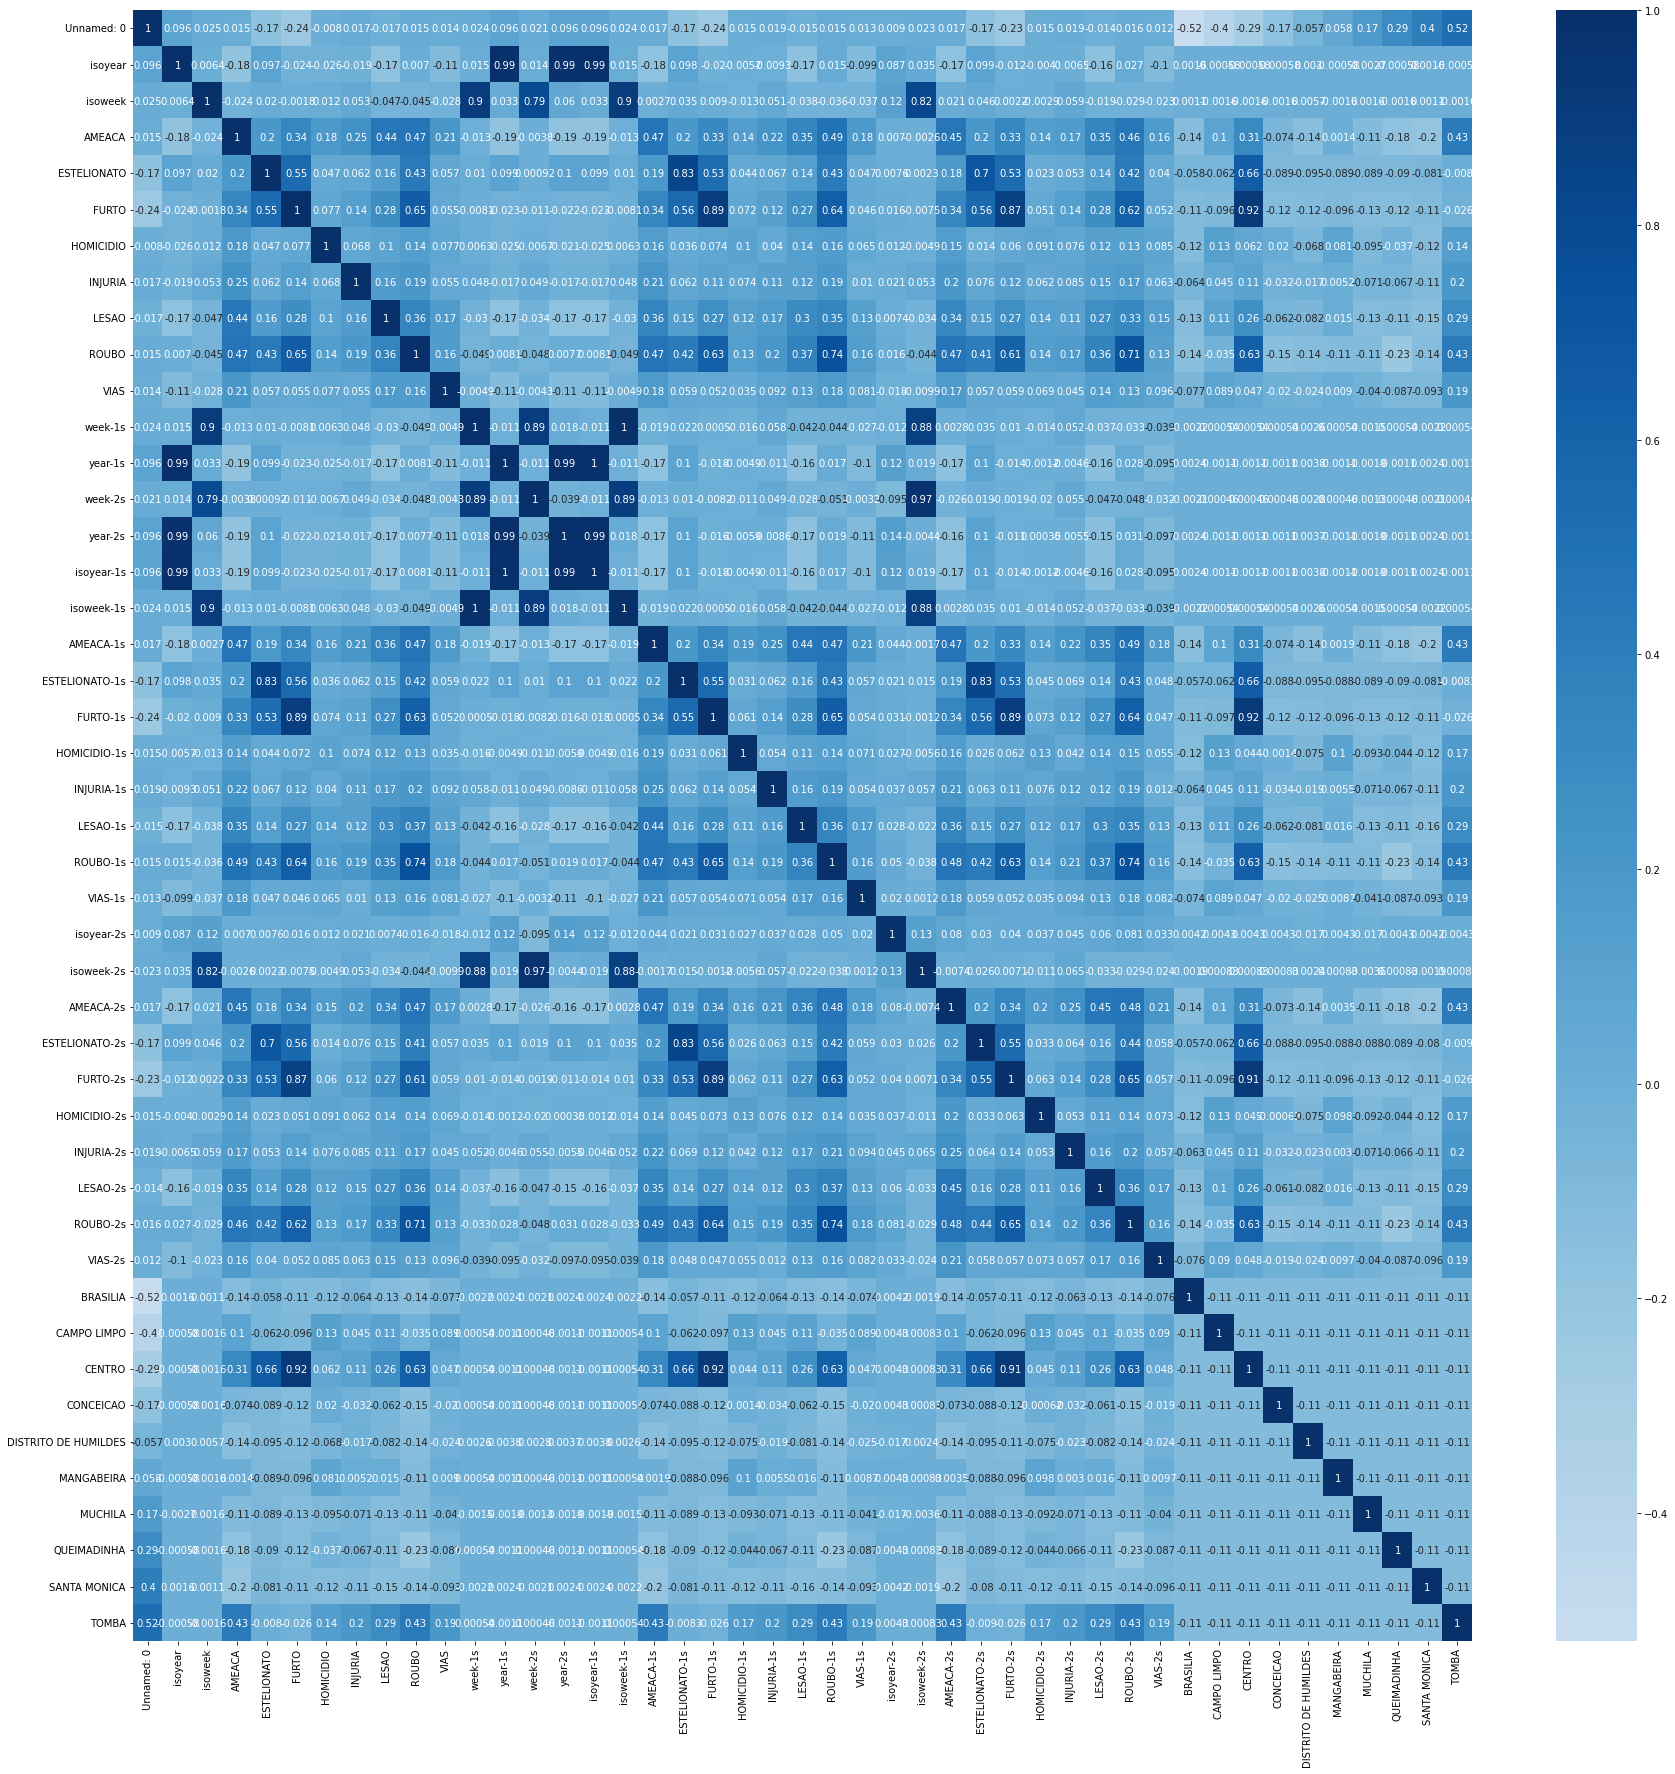

In [ ]:
corr = df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr, cmap="Blues",center=0, annot=True)

## Classificação

### Após experimentos com o balancemanto de classes da base de dados, observou-se que a técnica que possibilitou um melhor resultado foi a utilziação de amostragem, nesse sentido, os experimentos seguintes foram realizados nessa nova base de dados após a realização da amostragem.

In [16]:
features = ['isoyear', 'isoweek', 'AMEACA', 'ESTELIONATO', 'FURTO', 'INJURIA', 'LESAO', 'ROUBO', 'VIAS', 'week-1s',
            'year-1s', 'week-2s', 'year-2s', 'isoyear-1s', 'isoweek-1s', 'AMEACA-1s', 'ESTELIONATO-1s', 'FURTO-1s', 'HOMICIDIO-1s', 'INJURIA-1s',
            'LESAO-1s', 'ROUBO-1s', 'VIAS-1s', 'isoyear-2s', 'isoweek-2s', 'AMEACA-2s', 'ESTELIONATO-2s', 'FURTO-2s', 'HOMICIDIO-2s', 'INJURIA-2s', 'LESAO-2s', 'ROUBO-2s', 'VIAS-2s',
            'BRASILIA', 'CAMPO LIMPO', 'CENTRO', 'CONCEICAO', 'DISTRITO DE HUMILDES', 'MANGABEIRA', 'MUCHILA', 'QUEIMADINHA', 'SANTA MONICA', 'TOMBA']

classe = 'HOMICIDIO'

#x = subset[features]
#y = subset[classe]

#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

x_train = subset[features]
y_train = subset[classe]

y_test = test[classe]
x_test = test[features]

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2790, 43), (432, 43), (2790,), (432,))

### Métricas

In [ ]:
metrics = pd.DataFrame(index=['accuracy', 'precision', 'recall', 'AUC', 'Time to Train'], 
                       columns=['K Nearest Neighbors', 'Support Vector Machine', 'Decision Tree', 'Random Forest'])
metrics
                       

,K Nearest Neighbors,Support Vector Machine,Decision Tree,Random Forest
accuracy,NaN,NaN,NaN,NaN
precision,NaN,NaN,NaN,NaN
recall,NaN,NaN,NaN,NaN
AUC,NaN,NaN,NaN,NaN
Time to Train,NaN,NaN,NaN,NaN


### Classificadores

In [ ]:
classifier_knn = KNeighborsClassifier()
classifier_svm = SVC(random_state=0)
classifier_dt = DecisionTreeClassifier(random_state=0)
classifier_rf = RandomForestClassifier(random_state=0)

### Parâmetros

In [ ]:
param_grid_knn = {
    'classifier__n_neighbors': np.arange(1,20)
}
param_grid_svm = {
    'classifier__C': [0.1, 1, 10],
    'classifier__gamma': [1, 0.1, 0.01]
}
param_grid_dt = {
    'classifier__max_depth': [3, 10, 20, None],
    'classifier__min_samples_leaf': randint(1, 9),
    'classifier__criterion': ["entropy"]
}
param_grid_rf = {
    'classifier__n_estimators': [50, 100],
    'classifier__criterion': ["entropy"],
    'classifier__max_depth': [3, 10, 20, None],
    'classifier__min_samples_leaf': randint(1, 9),
}

### Função de Treinamento

In [ ]:
def train_and_score_model(model_name, estimator, param_grid=None, cv=5, iid=False):
    
    #### Step 5: Instantiate the CV Object
    
    cv = RandomizedSearchCV(estimator, param_grid, cv=cv, iid=False, random_state=None)

    # Treinamento
    t0 = time.time()
    cv.fit(x_train, y_train)
    ttt = time.time() - t0 # ttt stands for "time to train"
    print("It takes %.3f seconds for %s fitting" % (ttt, model_name))
    metrics.loc['Time to Train', model_name] = ttt

    #predict

    y_pred = cv.predict(x_test)

    # Avaliação

    print("Accuracy with " + model_name + "on the testing set is: %.3f" % cv.score(x_test, y_test))

    metrics.loc['accuracy', model_name] = accuracy_score(y_pred=y_pred, y_true=y_test)
    metrics.loc['precision', model_name] = precision_score(y_pred=y_pred, y_true=y_test)
    metrics.loc['recall', model_name] = recall_score(y_pred=y_pred, y_true=y_test)
    
    if model_name != 'Support Vector Machine':
        y_pred_prob = cv.predict_proba(x_test)[:,1]
        metrics.loc['AUC', model_name] = roc_auc_score(y_test, y_pred_prob)

    #print(Conf_Matrix(confusion_matrix(y_test, y_pred)))
    print(classification_report(y_test, y_pred))

    if model_name != 'Support Vector Machine':
        # ROC Curve
        fpr, tpr, thresholds  = roc_curve(y_test, y_pred_prob)
        plt.plot([0,1], [0,1], 'k--')
        plt.plot(fpr, tpr, label=model_name)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('%s ROC Curve' % model_name)
        plt.show()

    return cv

### Execução do Treinamento


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


It takes 7.431 seconds for Random Forest fitting
Accuracy with Random Foreston the testing set is: 0.644
              precision    recall  f1-score   support

         0.0       0.84      0.65      0.73       327
         1.0       0.36      0.63      0.46       105

    accuracy                           0.64       432
   macro avg       0.60      0.64      0.60       432
weighted avg       0.73      0.64      0.67       432



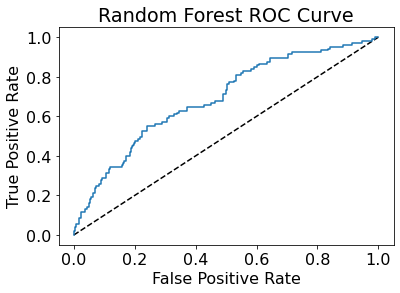

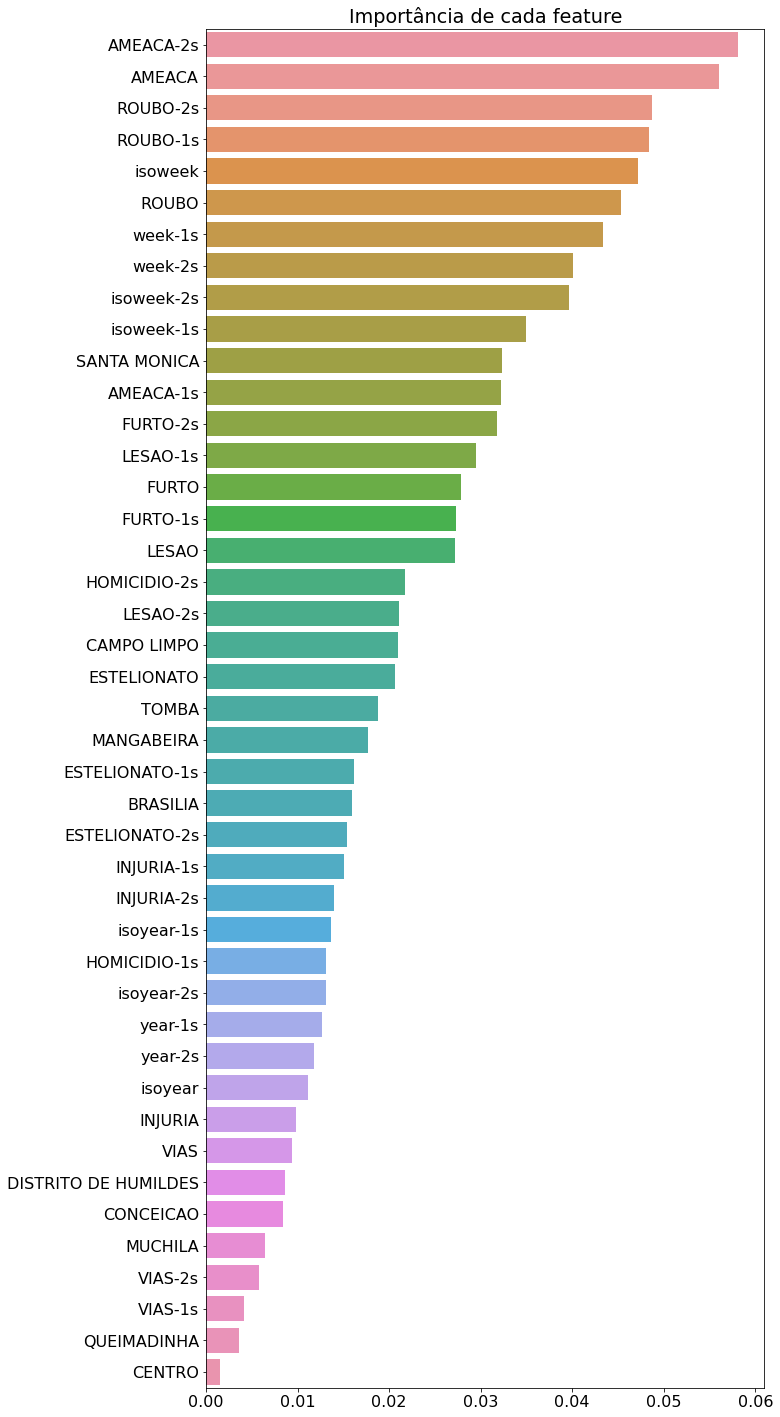

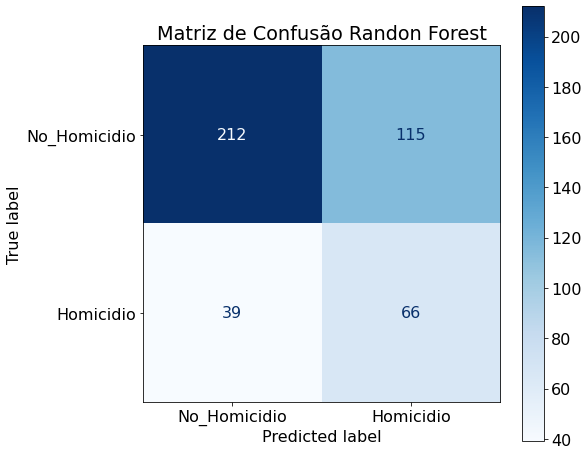

In [ ]:
#Randon Forest
pipeline = Pipeline(steps=[('classifier', classifier_rf)])
rf_cv = train_and_score_model('Random Forest', pipeline, param_grid_rf)

classifier_rf = RandomForestClassifier(
                                        criterion=rf_cv.best_params_['classifier__criterion'], 
                                        min_samples_leaf=rf_cv.best_params_['classifier__min_samples_leaf'], 
                                        n_estimators=rf_cv.best_params_['classifier__n_estimators'], 
                                        random_state=0
                                       )

score = classifier_rf.fit(x_train, y_train)

importances = pd.Series(data=classifier_rf.feature_importances_, index=features)
importances = importances.sort_values(ascending = False)
plt.figure(figsize=(10,25))
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

label_class = ['No_Homicidio', 'Homicidio']

fig, ax = plt.subplots(figsize=(8, 8))
plt.rcParams.update({'font.size': 16})
disp = plot_confusion_matrix(classifier_rf, x_test, y_test, display_labels=label_class, cmap=plt.cm.Blues, values_format = '.5g', ax=ax)
disp.ax_.set_title("Matriz de Confusão Randon Forest")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


It takes 0.976 seconds for K Nearest Neighbors fitting
Accuracy with K Nearest Neighborson the testing set is: 0.553
              precision    recall  f1-score   support

         0.0       0.77      0.59      0.67       327
         1.0       0.26      0.44      0.32       105

    accuracy                           0.55       432
   macro avg       0.51      0.51      0.49       432
weighted avg       0.64      0.55      0.58       432



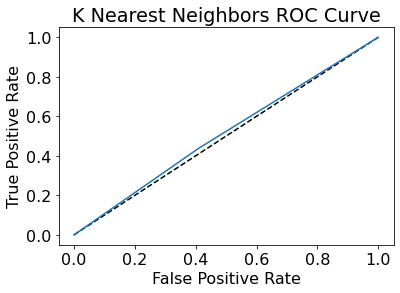

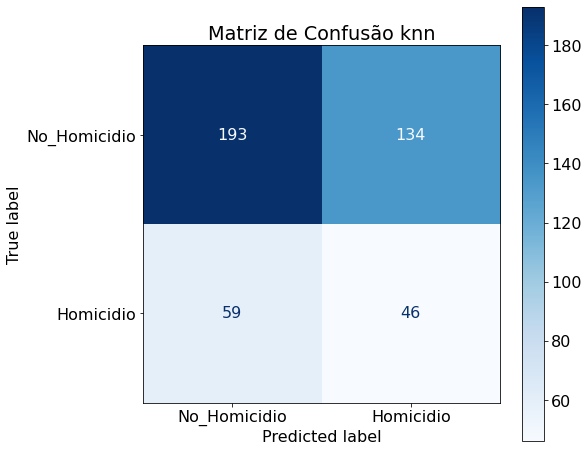

In [ ]:
pipeline = Pipeline(steps=[('classifier', classifier_knn)])
knn_cv = train_and_score_model('K Nearest Neighbors', pipeline, param_grid_knn)

classifier_knn = KNeighborsClassifier(
                                        n_neighbors=knn_cv.best_params_['classifier__n_neighbors'],
                                       )

score = classifier_knn.fit(x_train, y_train)

label_class = ['No_Homicidio', 'Homicidio']

fig, ax = plt.subplots(figsize=(8, 8))
plt.rcParams.update({'font.size': 16})
disp = plot_confusion_matrix(classifier_knn, x_test, y_test, display_labels=label_class, cmap=plt.cm.Blues, values_format = '.5g', ax=ax)
disp.ax_.set_title("Matriz de Confusão knn")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


It takes 2.270 seconds for Support Vector Machine fitting
Accuracy with Support Vector Machineon the testing set is: 0.461
              precision    recall  f1-score   support

         0.0       0.87      0.34      0.49       327
         1.0       0.29      0.85      0.43       105

    accuracy                           0.46       432
   macro avg       0.58      0.59      0.46       432
weighted avg       0.73      0.46      0.47       432



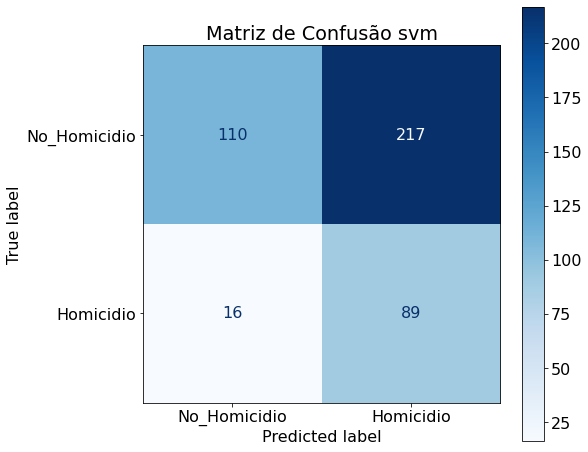

In [ ]:
pipeline = Pipeline(steps=[('classifier', classifier_svm)])
svm_cv = train_and_score_model('Support Vector Machine', pipeline, param_grid_svm)

classifier_svm = SVC(
                                        C=svm_cv.best_params_['classifier__C'],
                                        gamma=svm_cv.best_params_['classifier__gamma'],
                                       )

score = classifier_svm.fit(x_train, y_train)

label_class = ['No_Homicidio', 'Homicidio']

fig, ax = plt.subplots(figsize=(8, 8))
plt.rcParams.update({'font.size': 16})
disp = plot_confusion_matrix(classifier_svm, x_test, y_test, display_labels=label_class, cmap=plt.cm.Blues, values_format = '.5g', ax=ax)
disp.ax_.set_title("Matriz de Confusão svm")
plt.show()

### Seleção das Features mais relevantes para a classificação utilizando utilizando o método de ranqueamento "recursive feature elimination" (RFE)

In [ ]:
features = ['isoyear', 'isoweek', 'AMEACA', 'ESTELIONATO', 'FURTO', 'INJURIA', 'LESAO', 'ROUBO', 'VIAS', 'week-1s',
            'year-1s', 'week-2s', 'year-2s', 'isoyear-1s', 'isoweek-1s', 'AMEACA-1s', 'ESTELIONATO-1s', 'FURTO-1s', 'HOMICIDIO-1s', 'INJURIA-1s',
            'LESAO-1s', 'ROUBO-1s', 'VIAS-1s', 'isoyear-2s', 'isoweek-2s', 'AMEACA-2s', 'ESTELIONATO-2s', 'FURTO-2s', 'HOMICIDIO-2s', 'INJURIA-2s', 'LESAO-2s', 'ROUBO-2s', 'VIAS-2s',
            'BRASILIA', 'CAMPO LIMPO', 'CENTRO', 'CONCEICAO', 'DISTRITO DE HUMILDES', 'MANGABEIRA', 'MUCHILA', 'QUEIMADINHA', 'SANTA MONICA', 'TOMBA']

classe = 'HOMICIDIO'

In [ ]:
classifier_rf = RandomForestClassifier(criterion='entropy', min_samples_leaf=3, n_estimators=50, random_state=0)

rfe = RFE(classifier_rf, 6)
fit = rfe.fit(x_train, y_train)

cols = fit.get_support(indices=True)

kbest = []

for i in cols:
  kbest.append(features[i])

kbest


['ROUBO', 'week-2s', 'ROUBO-1s', 'isoweek-2s', 'AMEACA-2s', 'ROUBO-2s']

In [ ]:
features = kbest
classe = 'HOMICIDIO'

x = df[features]
y = df[classe]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

classifier_rf.fit(x_train, y_train)

y_pred = classifier_rf.predict(x_test)

acc = accuracy_score(y_pred=y_pred, y_true=y_test)
precision = precision_score(y_pred=y_pred, y_true=y_test)

print("Acurácia com as kbest melhores features: ", acc)
print("Precision com as kbest melhores features: ", precision)

Acurácia com as kbest melhores features:  0.7563025210084033
Precision com as kbest melhores features:  0.35


### Seleção das Features mais relevantes para a classificação utilizando utilizando o método de ranqueamento "recursive feature elimination" (RFE)

In [ ]:
features = kbest
classe = 'HOMICIDIO'

classifier_rf = RandomForestClassifier(criterion='entropy', min_samples_leaf=4, n_estimators=50, random_state=0)

features_selecteds = []

x_train_rfc = subset[features]
y_train_rfc = subset[classe]

y_test_rfc = test[classe]
x_test_rfc = test[features]

for k in range(1,12):
  rfe = RFE(classifier_rf, k)
  fit = rfe.fit(x_train_rfc, y_train_rfc)

  cols = fit.get_support(indices=True)

  for i in cols:
    features_selecteds.append(features[i])

  print("features: ", features_selecteds)
  x = df[features_selecteds]
  y = df[classe]

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

  classifier_rf.fit(x_train, y_train)
  y_pred = classifier_rf.predict(x_test)
  acc = accuracy_score(y_pred=y_pred, y_true=y_test)

  print("acc com ", k, "features:  ", acc)
  features_selecteds = []

features:  ['isoweek-2s']
acc com  1 features:   0.7671068427370948
features:  ['isoweek-2s', 'ROUBO-2s']
acc com  2 features:   0.7563025210084033
features:  ['ROUBO', 'isoweek-2s', 'ROUBO-2s']
acc com  3 features:   0.751500600240096
features:  ['ROUBO', 'ROUBO-1s', 'isoweek-2s', 'ROUBO-2s']
acc com  4 features:   0.765906362545018
features:  ['ROUBO', 'week-2s', 'ROUBO-1s', 'isoweek-2s', 'ROUBO-2s']
acc com  5 features:   0.7527010804321729
features:  ['ROUBO', 'week-2s', 'ROUBO-1s', 'isoweek-2s', 'AMEACA-2s', 'ROUBO-2s']
acc com  6 features:   0.7478991596638656
features:  ['ROUBO', 'week-2s', 'ROUBO-1s', 'isoweek-2s', 'AMEACA-2s', 'ROUBO-2s']
acc com  7 features:   0.7551020408163265
features:  ['ROUBO', 'week-2s', 'ROUBO-1s', 'isoweek-2s', 'AMEACA-2s', 'ROUBO-2s']
acc com  8 features:   0.7671068427370948
features:  ['ROUBO', 'week-2s', 'ROUBO-1s', 'isoweek-2s', 'AMEACA-2s', 'ROUBO-2s']
acc com  9 features:   0.7791116446578632
features:  ['ROUBO', 'week-2s', 'ROUBO-1s', 'isoweek

### Observamos que mesmo depois de uma busca exaustiva pelos melhores parâmetros para os modelos ainda é muito difícil de prever corretamente se irá acontecer um homicídio. Possívelmente a base de dados não disponibilizar informações duficientes para esta tarefa.

## Predição

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd95ed5b50>]],
      dtype=object)

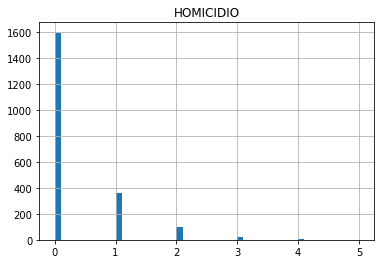

In [12]:
df.hist(bins=50, column='HOMICIDIO')

#### Para o trabalho de predição, vamos tentar prever a quantidade de homicídios que irão acontecer em cada semana.

In [16]:
features = ['isoyear', 'isoweek', 'AMEACA', 'ESTELIONATO', 'FURTO', 'INJURIA', 'LESAO', 'ROUBO', 'VIAS', 'week-1s',
            'year-1s', 'week-2s', 'year-2s', 'isoyear-1s', 'isoweek-1s', 'AMEACA-1s', 'ESTELIONATO-1s', 'FURTO-1s', 'HOMICIDIO-1s', 'INJURIA-1s',
            'LESAO-1s', 'ROUBO-1s', 'VIAS-1s', 'isoyear-2s', 'isoweek-2s', 'AMEACA-2s', 'ESTELIONATO-2s', 'FURTO-2s', 'HOMICIDIO-2s', 'INJURIA-2s', 'LESAO-2s', 'ROUBO-2s', 'VIAS-2s',
            'BRASILIA', 'CAMPO LIMPO', 'CENTRO', 'CONCEICAO', 'DISTRITO DE HUMILDES', 'MANGABEIRA', 'MUCHILA', 'QUEIMADINHA', 'SANTA MONICA', 'TOMBA']

label = 'HOMICIDIO'

x = df[features]
y = df[label]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1249, 43), (833, 43), (1249,), (833,))

In [54]:
len(x_train), len(y_train), len(x_test), len(y_test)

(462, 462, 309, 309)

## Definição dos Modelos utilizados

In [17]:
Linear_model = linear_model.LinearRegression()
Linear_model = linear_model.Ridge(alpha=0.8)

In [18]:
SVR_model = SVR(kernel='rbf', C=1000, gamma=0.1, epsilon=0.1)

In [19]:
KNN_model =  neighbors.KNeighborsRegressor(n_neighbors=50, weights='uniform') # weights 'uniform' or 'distance'

## Treinamento do Regressor

In [20]:
Linear_model.fit(x_train, y_train)
SVR_model.fit(x_train, y_train)
KNN_model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=50)

## Avaliação dos Modelos Treinados

In [21]:
Linear_pred = Linear_model.predict(x_test)
SVR_pred = SVR_model.predict(x_test)
KNN_pred = KNN_model.predict(x_test)

In [22]:

# Mean squared error
print("Mean Squared Error para o modelo utilizando Regressão Linear: %.2f" % mean_squared_error(y_test, Linear_pred))
print("Mean Squared Error para o modelo utilizando Regressão SVM: %.2f" % mean_squared_error(y_test, SVR_pred))
print("Mean Squared Error para o modelo utilizando Regressão KNN: %.2f" % mean_squared_error(y_test, KNN_pred))

# The coefficient of determination: 1 is perfect prediction
print("R2 para o modelo utilizando Regressão Linear: %.2f" % r2_score(y_test, Linear_pred))
print("R2 para o modelo utilizando Regressão SVM: %.2f" % r2_score(y_test, SVR_pred))
print("R2 para o modelo utilizando Regressão KNN: %.2f" % r2_score(y_test, KNN_pred))

Mean Squared Error para o modelo utilizando Regressão Linear: 0.40
Mean Squared Error para o modelo utilizando Regressão SVM: 0.40
Mean Squared Error para o modelo utilizando Regressão KNN: 0.40
R2 para o modelo utilizando Regressão Linear: 0.01
R2 para o modelo utilizando Regressão SVM: 0.01
R2 para o modelo utilizando Regressão KNN: 0.02


# Conclusões

#### Podemos observar que a base de dados utilziada para este trabalho é desafiadora, no sentido de que é difícil encontrar um modelo que consiga realizar classificações e predições corretamentes. Exístem uma série de fatores que podem influenciar nesse acontecimento, desde problemas nos dados até quantidade insuficiente de informações.